<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
# importing the relevant libraries that are going to be needed during this notebook: 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replication of the Lesson Code: 

In [3]:
#storing the URL of the dataset prior to sanitizing the data. 
Lecture_URL = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'
#reading in the url to to the read_csv function of pandas df.
lecture_df =  pd.read_csv(Lecture_URL)
#visualizing the first 10 rows of data in the lecture DF. 
lecture_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

In [4]:
#tells pandas DF to set the max display of rows to 12 in this instance. 
pd.set_option('display.max_rows', 12)
#this tests the above code -- in that when you try to see "dtypes" of the lecture df you will only see 12 rows of data. 
lecture_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

# Clerical Notes:

- I'm of the opinion that `print(df) or df.'column'.head()` looks infinetly more dog shit than `df or df[['column']].head()`. So I'm not even going to copy it. 

- There is a reason were using pandas dataframes and not the terminal output. 

In [5]:
#from looking at the head() we can see that LotFrontage has some NaNs which are going to be troubling -->The below code shows us how many NaNs we have --> another neat trick of finding NaNs
lecture_df['LotFrontage'].value_counts(dropna=False)

#also not that we have a limited output --> of precisely 12 regardless of how many entries there are!

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

# Methods of detecting NaNs 
---
- Using any of the following codes:
  - `df.isnull().sum()` 
  - `df.value_counts(dropna=False)`
  -
---
---
# Methods of cleaning up NaNs
---
- Using any of the following codes:
  - `df.dropna(inplace=True)`
  - 
----

In [6]:
#making features --> Essentially when a dataset is too large to generate figures easily of the whole thing -- it helps slicing it into smaller data tables to tabulate more relevant data faster. 
#Column: TotalBsmtSF, 1stFlrSF, 2ndFlrSF, SalePrice, OverallQual, OverallCond, YearBuilt

sub1_df = lecture_df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'YearBuilt', 'SalePrice']].copy()
sub1_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,OverallQual,OverallCond,YearBuilt,SalePrice
0,856,856,854,7,5,2003,208500
1,1262,1262,0,6,8,1976,181500
2,920,920,866,7,5,2001,223500
3,756,961,756,7,5,1915,140000
4,1145,1145,1053,8,5,2000,250000


In [7]:
#making a new column to visualize the total square footage from the lecture dataset --> this invovles summing Basement + 1st Floor + 2nd Floor square footage. 

sub1_df['TotalSquareFootage'] = sub1_df['TotalBsmtSF'] + sub1_df['1stFlrSF'] + sub1_df['2ndFlrSF']
sub1_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,OverallQual,OverallCond,YearBuilt,SalePrice,TotalSquareFootage
0,856,856,854,7,5,2003,208500,2566
1,1262,1262,0,6,8,1976,181500,2524
2,920,920,866,7,5,2001,223500,2706
3,756,961,756,7,5,1915,140000,2473
4,1145,1145,1053,8,5,2000,250000,3343


In [8]:
#doing further analysis on the code --> generating a Price / Squarefoot. 

sub1_df['PricePerSqFt'] = sub1_df['SalePrice'] / sub1_df['TotalSquareFootage']
sub1_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,OverallQual,OverallCond,YearBuilt,SalePrice,TotalSquareFootage,PricePerSqFt
0,856,856,854,7,5,2003,208500,2566,81.254871
1,1262,1262,0,6,8,1976,181500,2524,71.909667
2,920,920,866,7,5,2001,223500,2706,82.594235
3,756,961,756,7,5,1915,140000,2473,56.611403
4,1145,1145,1053,8,5,2000,250000,3343,74.783129


# Notes on crosstabs: Substitution of copying code pointlessly.  

- The lecture goes into generating some crosstabs using categorical data and at this point looking at that data dictonary seems stupid. So here's a high level summary on how to do crosstabs. 
   - `pd.crosstab(df['column1'], df['column2']) ` --> this the code to simply make a cross tab. 
   - `pd.crosstab(df['column1'], df['column2'], margins=True)` --> `margins=True` adds column and row totals. 
   - `pd.crosstab(df['column1'], df['column2'], margins=True, normalize='index')` --> `normalize='index'` changes the tabulation of values from counts to porportions of counts. 
   - `[pd.crossframe].plot(kind='x')` --> the first part is some crossframe stored as a variable. x represents the type of graph; options include= `barh` (horizontal barplot), `bar` (verticle barplot).


In [10]:
#recreating a crosstab to proceed with the assignment. 
pd.crosstab(lecture_df['Alley'], lecture_df['LotShape'], margins=True, normalize='index')

LotShape,IR1,IR2,IR3,Reg
Alley,,,,
Grvl,0.080000,0.000000,0.020000,0.900000
Pave,0.170732,0.048780,0.000000,0.780488
All,0.120879,0.021978,0.010989,0.846154


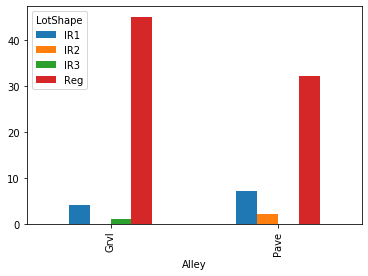

In [12]:
#visualizing the crosstab. 
visual = pd.crosstab(lecture_df['Alley'], lecture_df['LotShape'])
visual.plot(kind='bar');

In [13]:
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-03-15 20:31:13--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [<=>                 ]  21.71M   787KB/s    in 29s     

2020-03-15 20:31:42 (773 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22763850]



In [61]:
! unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: LoanStats_2018Q4.csv    


In [62]:
#storing the files in LoanStats_2018Q4 in a pandas dataframe. 
df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')
df.shape

(128284, 144)

In [63]:
#visualing the dataset -- Looks messy at cursory analysis. NaNs and mixed data sets with unclear column headers. 
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4411.89,4411.89,2792.250000,2792.25,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Late (31-120 days),n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,21975.89,21975.89,5848.050000,5848.05,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,26429.58,26429.58,11903.650000,11903.65,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,10000,10000,10000.0,36 months,16.14%,352.27,C,C4,Training Manager,10+ years,MORTGAGE,94800.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,325xx,FL,28.59,0,Jan-2009,1,NaN,NaN,18,0,49976,65.8%,37,w,6928.87,6928.87,4566.060000,4566.06,...,33.3,0,0,415969,95754,24100,71489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,25000,25000,25000.0,60 months,12.98%,568.58,B,B5,Tire builder,10+ years,MORTGAGE,85000.0,Not Verified,Dec-2

In [64]:
#checking to see where the NaNs are in the dataset. 
pd.set_option('display.max_rows', 200)
df.isnull().sum().sort_values(ascending=True)

inq_fi                                             0
delinq_amnt                                        0
chargeoff_within_12_mths                           0
acc_open_past_24mths                               0
inq_last_12m                                       0
total_cu_tl                                        0
total_rev_hi_lim                                   0
max_bal_bc                                         0
open_rv_24m                                        0
open_rv_12m                                        0
total_bal_il                                       0
open_il_24m                                        0
hardship_flag                                      0
open_act_il                                        0
open_acc_6m                                        0
tot_cur_bal                                        0
tot_coll_amt                                       0
acc_now_delinq                                     0
application_type                              

In [0]:
#drop out some of the NaN'd values. 
df = df.drop(['url', 'member_id', 'desc', 'id'], axis=1)

# Notes on exploration of pandas df. 

- `df['column'].head()` --> lets you see the first 10 values of a column
- `df['column'][x]` --> lets you see the the x indexed value (aka x+1 thing) in that column.
- `type(df['column'][x])` --> tells you what type of thing the above is. 
 

# Notes of dissection of values in order to generate a re-usable function. 



```
Assume we begin with the following string --> ' 12.98%' 
```
- This has the following problems: if we want to just do math on the number
 - has a leading space
 - has a percent sign
 - make the type a `float`



```
def myfunc(cell_contents):
  return float(cell_contents.strip().strip('%'))

#to test --> 
myfunct(int_rate)
```



In [0]:
#pasting in the above function: 
def myfunc(cell_contents):
  return float(cell_contents.strip().strip('%'))

In [0]:
#applying the above function to every column in our new dataset. 
new_list = []

#loop for doing the above in new_list
for cell in df['int_rate']:
  new_list.append(myfunc(cell))

In [69]:
#visualizing the first 10 values of that new list 
new_list[:10]

[16.14, 11.8, 11.31, 14.47, 27.27, 16.14, 12.98, 10.33, 23.4, 10.72]

In [71]:
#converting the list into a new column. 
df_new = df.copy()
df_new['int_rate_cleaned'] = pd.Series(new_list)
df_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_cleaned
0,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,10000.00,661.06,0.0,0.0,...,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14
1,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4411.89,4411.89,2792.250000,2792.25,2088.11,704.14,0.0,0.0,...,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,11.80
2,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,4500.00,49.22,0.0,0.0,...,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,11.31
3,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Late (31-120 days),n,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,21975.89,21975.89,5848.050000,5848.05,3024.11,2823.94,0.0,0.0,...,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47
4,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,26429.58,26429.58,11903.650000,11903.65,3570.42,8333.23,0.0,0.0,...,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,27.27


In [72]:
#visualize the top 20 employment titles. 
df['emp_title'].value_counts(dropna=False)[:20]

NaN                   20922
Teacher                2088
Manager                1771
Registered Nurse        950
Driver                  924
RN                      724
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          520
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [73]:
# how many non NaN titles is there?
len(df['emp_title'].unique())

43852

In [0]:
# example matrix that has some columns that were trying to clean up. 
example = ['owner', 'Supervisor', ' Project Manager', np.nan]

In [0]:
# function that cleans up these cases and increases "uniformity"

def clean_title(job_title):
  if isinstance(job_title, str):
    return job_title.title().strip()
  else:
    return "Unknown"

In [0]:
# creating a loop:

empty_list=[]
for title in example:
  empty_list.append(clean_title(title))


In [77]:
# interating function calls and for loops over lists  --> into one clean line of code:

[clean_title(title) for title in example]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [78]:
# the above validates the function cleans things up as expected so now were going to run this over the larger dataset. 
# this is probably the principle you wnat to use to for testing things instead of breaking the dataset all the time. 
# were going to overwrite the original column next. 

df_new['emp_title']=df_new['emp_title'].apply(clean_title)
df_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_cleaned
0,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,10000.00,661.06,0.0,0.0,...,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14
1,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4411.89,4411.89,2792.250000,2792.25,2088.11,704.14,0.0,0.0,...,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,11.80
2,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner Iii,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,4500.00,49.22,0.0,0.0,...,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,11.31
3,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,Teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Late (31-120 days),n,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,21975.89,21975.89,5848.050000,5848.05,3024.11,2823.94,0.0,0.0,...,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47
4,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,26429.58,26429.58,11903.650000,11903.65,3570.42,8333.23,0.0,0.0,...,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,27.27


In [79]:
# check to see what the progress is --> the above is so we don't have to keep scrolling. Don't trigger Amy+Ben! 
# owner went up from 420 --> 623
df_new['emp_title'].value_counts(ascending=False)[:20]

Unknown               20922
Teacher                2553
Manager                2393
Registered Nurse       1416
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      832
Office Manager          804
Sales                   803
General Manager         791
Project Manager         720
Owner                   623
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   424
Technician              420
Engineer                411
Name: emp_title, dtype: int64

In [0]:
# next challenge is to start understanding how to work with time 

#this method is doing it as a loop
mylist=[]
for col in df.columns:
  if col.endswith('_d'):
    mylist.append(col)

In [0]:
#this method is how you would do it as list comprehension:

mycols = [col for col in df.columns if col.endswith('_d')]

In [80]:
df_new['issue_d'][:12]

0     Dec-2018
1     Dec-2018
2     Dec-2018
3     Dec-2018
4     Dec-2018
5     Dec-2018
6     Dec-2018
7     Dec-2018
8     Dec-2018
9     Dec-2018
10    Dec-2018
11    Dec-2018
Name: issue_d, dtype: object

In [81]:
# the string is in the format %m:%y --> pandas can detect this common type. 
#notice that when this does this --> it assumes the date is always the first of the month!!

df_new['issue_d'] = pd.to_datetime(df_new['issue_d'], infer_datetime_format=True)
df_new[mycols].head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,2018-12-01,May-2019,NaN,Dec-2019
1,2018-12-01,Feb-2020,Mar-2020,Jan-2020
2,2018-12-01,Feb-2019,NaN,Feb-2020
3,2018-12-01,Oct-2019,Mar-2020,Jan-2020
4,2018-12-01,Feb-2020,Mar-2020,Jan-2020


In [82]:
# this shows that the issue_d column got changed into a datetime object

df_new['issue_d'].iloc[0]

Timestamp('2018-12-01 00:00:00')

In [83]:
# a datetime object has more info see below: 

df_new['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [84]:
# a .dt accessor is going to be used to grab specific parts of the datetime object. 
# note that this pulled out what the "year" was in issue_d and made a separate column of it. 

df_new1=df_new[mycols].copy()
df_new1['year']=df_new1['issue_d'].dt.year
df_new1.head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d,year
0,2018-12-01,May-2019,NaN,Dec-2019,2018
1,2018-12-01,Feb-2020,Mar-2020,Jan-2020,2018
2,2018-12-01,Feb-2019,NaN,Feb-2020,2018
3,2018-12-01,Oct-2019,Mar-2020,Jan-2020,2018
4,2018-12-01,Feb-2020,Mar-2020,Jan-2020,2018


In [85]:
# same dealio kabob but with the month instead. 

df_new1['month']=df_new1['issue_d'].dt.month
df_new1.head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d,year,month
0,2018-12-01,May-2019,NaN,Dec-2019,2018,12
1,2018-12-01,Feb-2020,Mar-2020,Jan-2020,2018,12
2,2018-12-01,Feb-2019,NaN,Feb-2020,2018,12
3,2018-12-01,Oct-2019,Mar-2020,Jan-2020,2018,12
4,2018-12-01,Feb-2020,Mar-2020,Jan-2020,2018,12


In [86]:
# the type of this information went from mixed to both int. 

df_new1.dtypes[-2:]

year     int64
month    int64
dtype: object

In [88]:
# adding this to the original dataframe instead of just testing around. 

df_new1['last_credit_pull_d']=pd.to_datetime(df_new1['last_credit_pull_d'], infer_datetime_format=True)
df_new1.head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d,year,month
0,2018-12-01,May-2019,NaN,2019-12-01,2018,12
1,2018-12-01,Feb-2020,Mar-2020,2020-01-01,2018,12
2,2018-12-01,Feb-2019,NaN,2020-02-01,2018,12
3,2018-12-01,Oct-2019,Mar-2020,2020-01-01,2018,12
4,2018-12-01,Feb-2020,Mar-2020,2020-01-01,2018,12


In [55]:
# were going to do some arithmetic that generates some dates then puts this information ina ndew column. 

df['last_credit_pull_d'] - df['issue_d']

df['day_diff'] = (df['last_credit_pull_d'] - df['issue_d']).dt.days

df.head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d,year,month,day_diff
0,2018-12-01,May-2019,NaN,2019-12-01,2018,12,365.0
1,2018-12-01,Feb-2020,Mar-2020,2020-01-01,2018,12,396.0
2,2018-12-01,Feb-2019,NaN,2020-02-01,2018,12,427.0
3,2018-12-01,Oct-2019,Mar-2020,2020-01-01,2018,12,396.0
4,2018-12-01,Feb-2020,Mar-2020,2020-01-01,2018,12,396.0


# This where the lecture content ends: 

**And we start the below portion of the assignment:** 
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

# Converting the `term` column from a string to an integer

In [89]:
# converting the term column from a string to an integer. 

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,10000.00,661.06,0.0,0.0,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4411.89,4411.89,2792.250000,2792.25,2088.11,704.14,0.0,0.0,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,4500.00,49.22,0.0,0.0,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Late (31-120 days),n,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,21975.89,21975.89,5848.050000,5848.05,3024.11,2823.94,0.0,0.0,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,26429.58,26429.58,11903.650000,11903.65,3570.42,8333.23,0.0,0.0,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# testing out a cure to a single value in the term column. 
test_term = df['term'].iloc[0]
print(test_term)

 60 months


In [92]:
# dropping the month term. 
test_term.strip(' months')

'60'

In [96]:
# converting the string to a float. 
int(test_term.strip(' months'))

60

In [97]:
#testing the whole ting
type(int(test_term.strip(' months')))

int

In [0]:
#making a function to do this for the whole column. 

def intfunc(cell_contents):
  return int(cell_contents.strip(' months'))

In [99]:
#running the function on our test term.
intfunc(test_term)

60

In [100]:
#verifying the function did its job right
type(intfunc(test_term))

int

In [101]:
# to apply this to our function 
df['cleaned_term'] = df['term'].apply(intfunc)
df.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,cleaned_term
0,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,10000.00,661.06,0.0,0.0,...,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,60
1,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4411.89,4411.89,2792.250000,2792.25,2088.11,704.14,0.0,0.0,...,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,36
2,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,4500.00,49.22,0.0,0.0,...,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,36
3,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Late (31-120 days),n,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,21975.89,21975.89,5848.050000,5848.05,3024.11,2823.94,0.0,0.0,...,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,60
4,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,26429.58,26429.58,11903.650000,11903.65,3570.42,8333.23,0.0,0.0,...,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,60
5,10000,10000,10000.0,36 months,16.14%,352.27,C,C4,Training Manager,10+ years,MORTGAGE,94800.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,325xx,FL,28.59,0,Jan-2009,1,NaN,NaN,18,0,49976,65.8%,37,w,6928.87,6928.87,4566.060000,4566.06,3071.13,1494.93,0.0,0.0,...,0,0,415969,95754,24100,71489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,36
6,25000,25000,25000.0,60 months,12.98%,568.58,B

# Making a column named `loan_status_is_great` that contains the integer `1` `if` the column `loan_status` is "current" or "fully paid". `else` it should contain the integer `0`

In [102]:
#Make a column named loan_status_is_great. 
#It should contain the integer 1 if loan_status is "Current" or "Fully Paid." 
#Else it should contain the integer 0.

test_loan = df['loan_status']
test_loan.head(12)

0             Fully Paid
1                Current
2             Fully Paid
3     Late (31-120 days)
4                Current
5                Current
6                Current
7                Current
8             Fully Paid
9             Fully Paid
10               Current
11            Fully Paid
Name: loan_status, dtype: object

In [107]:
#stores the information of current // fully paid or not in a matrix. 
new_loan = []
for loan in test_loan:
  if loan.lower() == "current" or loan.lower() == "fully paid":
    new_loan.append(1)
  else:
    new_loan.append(0)

print(new_loan)

[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 

In [113]:
#appends the df that contains the full dataset with the "loan_is_great" info
df_new['loan_status_is_great'] = new_loan

#making a sub dataframe to show that it worked instead of scrolling. I hate scrolling thats lame as fucking all hell. 
test_df = df_new[['loan_status', 'loan_status_is_great', 'loan_amnt', 'int_rate_cleaned']].copy()

#as we can see it worked! 
test_df.head(10)

,loan_status,loan_status_is_great,loan_amnt,int_rate_cleaned
0,Fully Paid,1,10000,16.14
1,Current,1,6500,11.80
2,Fully Paid,1,4500,11.31
3,Late (31-120 days),0,25000,14.47
4,Current,1,30000,27.27
5,Current,1,10000,16.14
6,Current,1,25000,12.98
7,Current,1,3000,10.33
8,Fully Paid,1,1250,23.40
9,Fully Paid,1,7000,10.72


# Making `last_pymnt_d_month` and `last_pymnt_d_year` columns 

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01